# Importing libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
rcParams["figure.figsize"] = 12,8

# Loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\amalr\Downloads\COVID-19 Activity.csv")

C:\Users\amalr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,12,NaN,NaN,2020-05-20,America,JHU CSSE Global Timeseries,0,NaN,TCA,Turks and Caicos Islands,TC,0,1
1,12,NaN,NaN,2020-05-07,America,JHU CSSE Global Timeseries,0,NaN,TCA,Turks and Caicos Islands,TC,0,1
2,12,NaN,NaN,2020-06-11,America,JHU CSSE Global Timeseries,0,NaN,TCA,Turks and Caicos Islands,TC,0,1
3,910,NaN,NaN,2021-01-04,America,JHU CSSE Global Timeseries,0,NaN,TCA,Turks and Caicos Islands,TC,0,6
4,698,NaN,NaN,2020-10-18,America,JHU CSSE Global Timeseries,0,NaN,TCA,Turks and Caicos Islands,TC,0,6


## Removing unwanted columns

In [4]:
columns=['PEOPLE_POSITIVE_CASES_COUNT','COUNTY_NAME','PROVINCE_STATE_NAME','CONTINENT_NAME','DATA_SOURCE_NAME','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_ALPHA_2_CODE','PEOPLE_DEATH_COUNT']
df.drop(columns,axis=1,inplace=True)
df.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-05-20,0,Turks and Caicos Islands,0
1,2020-05-07,0,Turks and Caicos Islands,0
2,2020-06-11,0,Turks and Caicos Islands,0
3,2021-01-04,0,Turks and Caicos Islands,0
4,2020-10-18,0,Turks and Caicos Islands,0


## Checking for Nan Values

In [5]:
df.isna().sum()

REPORT_DATE                        0
PEOPLE_DEATH_NEW_COUNT             0
COUNTRY_SHORT_NAME                 0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
dtype: int64

## Separating out India's Data

In [6]:
df_ind = df[df["COUNTRY_SHORT_NAME"]=="India"]

In [7]:
df_ind.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
3674,2020-09-02,1043,India,83883
3675,2021-04-07,685,India,126789
3676,2021-04-06,630,India,115736
3677,2020-11-18,585,India,45576
3678,2020-05-26,172,India,5843


In [8]:
# taking only the confirmed cases
ind = df_ind[['REPORT_DATE','PEOPLE_POSITIVE_NEW_CASES_COUNT']]
ind

,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
3674,2020-09-02,83883
3675,2021-04-07,126789
3676,2021-04-06,115736
3677,2020-11-18,45576
3678,2020-05-26,5843
...,...,...
18924,2021-03-02,14989
18925,2020-05-18,4630
18926,2020-05-10,4353
18927,2020-02-02,1


#### Changing the columns names

In [9]:
ind.columns = ["Date","Confirmed"]

In [10]:
ind.head()

,Date,Confirmed
3674,2020-09-02,83883
3675,2021-04-07,126789
3676,2021-04-06,115736
3677,2020-11-18,45576
3678,2020-05-26,5843


In [11]:
# grouping datatogether by date
ind1 = ind.groupby('Date')['Confirmed'].sum().reset_index()
ind1

,Date,Confirmed
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
460,2021-04-25,352991
461,2021-04-26,323023
462,2021-04-27,360927
463,2021-04-28,379308


In [12]:
# removing outlier 
ind1.drop(ind1.index[464],inplace = True)

##### Setting date as index

In [13]:
# changing the index as date
ind1["Date"] = pd.to_datetime(ind1["Date"],infer_datetime_format = True)
ind = ind1.set_index('Date')
ind

,Confirmed
Date,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
...,...
2021-04-24,349691
2021-04-25,352991
2021-04-26,323023


## Plotting the Data

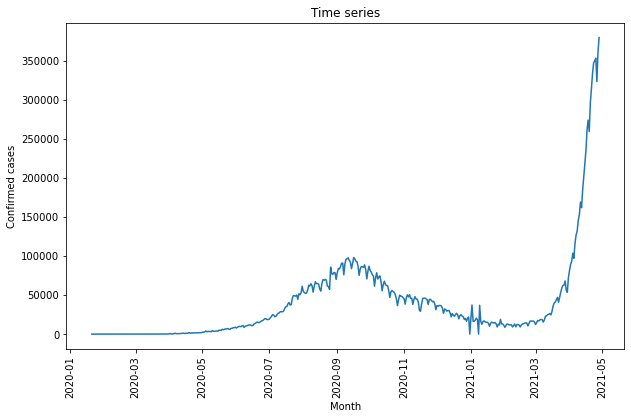

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(ind)

# Set plot title and axes labels
ax.set(title = "Time series",
       xlabel = "Month",
       ylabel = "Confirmed cases")

plt.setp(ax.get_xticklabels(), rotation = 90)

plt.show()


## ETS decomposition

##### Describes Data as a as a combination of level, trend, seasonality, and noise components

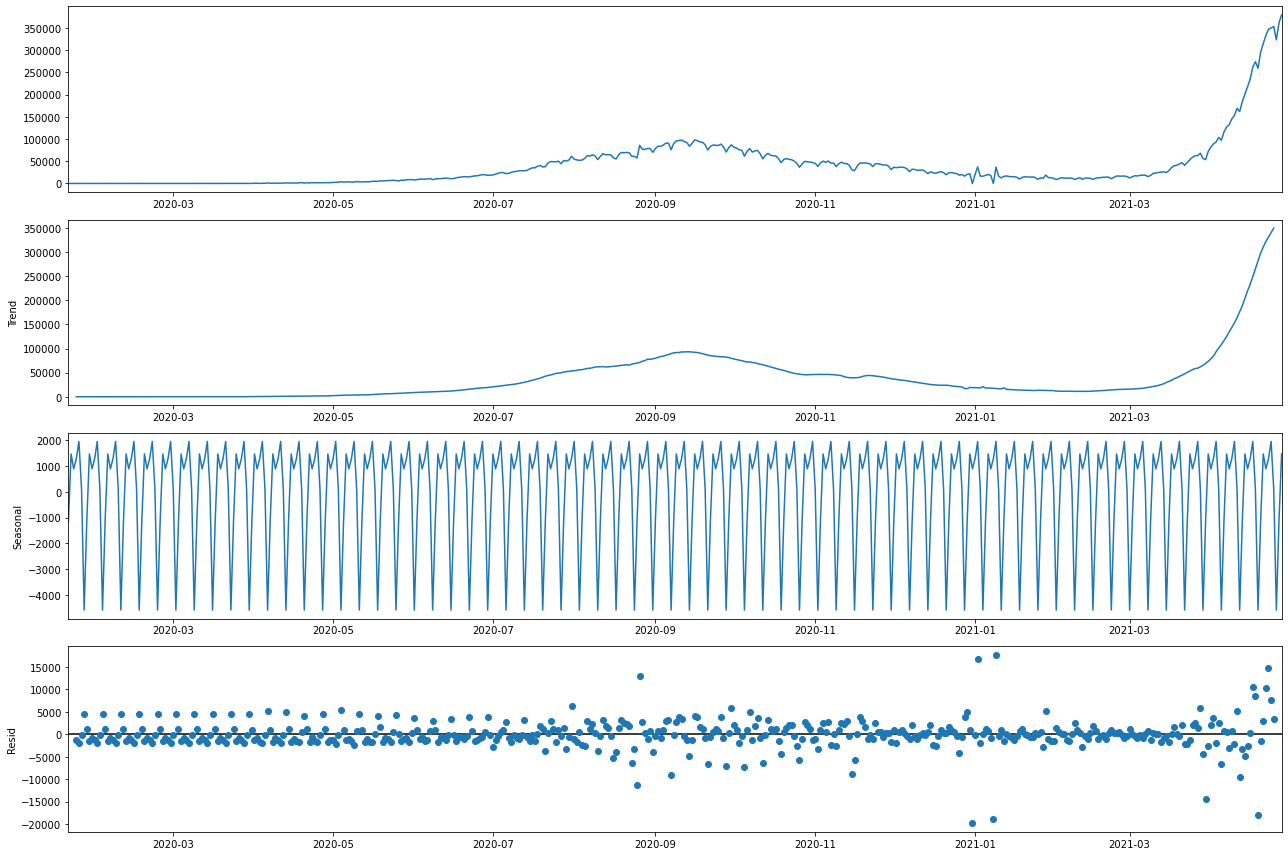

In [15]:
#ets decomposition
from pylab import rcParams
rcParams['figure.figsize']=18,12
decompo= sm.tsa.seasonal_decompose(ind,model='additive')
decompo.plot();

## Testing for Stationarity

In [16]:
#determine rolling stats
rolmean = ind.rolling(window = 4).mean()
rolstd = ind.rolling(window = 4).std()
print(rolmean,rolstd)

            Confirmed
Date                 
2020-01-21        NaN
2020-01-22        NaN
2020-01-23        NaN
2020-01-24       0.00
2020-01-25       0.00
...               ...
2021-04-24  336010.50
2021-04-25  345597.25
2021-04-26  343122.75
2021-04-27  346658.00
2021-04-28  354062.25

[464 rows x 1 columns]                Confirmed
Date                    
2020-01-21           NaN
2020-01-22           NaN
2020-01-23           NaN
2020-01-24      0.000000
2020-01-25      0.000000
...                  ...
2021-04-24  16013.950304
2021-04-25   8822.825865
2021-04-26  13637.492643
2021-04-27  16447.122991
2021-04-28  23445.364167

[464 rows x 1 columns]


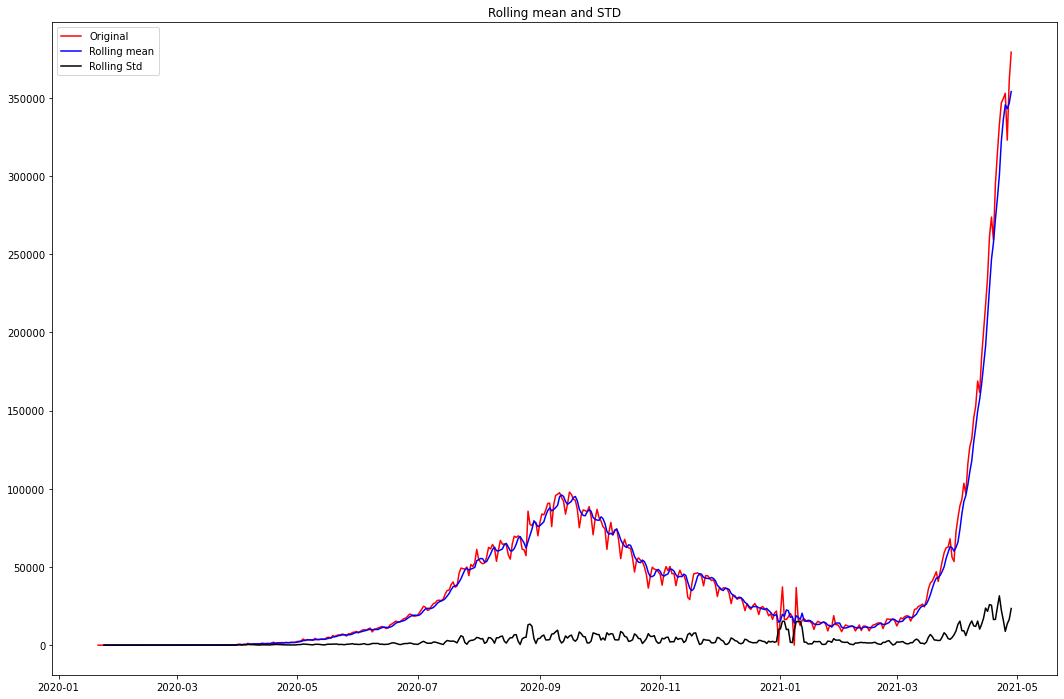

In [17]:
# plotting the rolling statistic
orig = plt.plot(ind, color = "red", label = "Original")
mean = plt.plot(rolmean, color = "blue", label = "Rolling mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling mean and STD")
plt.show(block = False)

Here both mean and std is not constanrt so the data is not ststionary

In [18]:
#perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey_Fuller Test:")
dftest = adfuller(ind["Confirmed"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistics", "p-value","#Lags Used","Number of Observations Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

Result of Dickey_Fuller Test:
Test Statistics                 -0.985921
p-value                          0.758365
#Lags Used                      14.000000
Number of Observations Used    449.000000
Critical Value (1%)             -3.444998
Critical Value (5%)             -2.867999
Critical Value (10%)            -2.570210
dtype: float64


Here p value is very large and Test Statistic is greater Critical value and so we don't have enough evidence to reject Null Hypothesis.
Therfore the data is non Stationary

### Splitting values for training and testing

In [19]:
ind.shape

(464, 1)

In [20]:
#spliting the dataset
train_df = ind.iloc[:430]
test_df = ind.iloc[430:]

# Finding  best model

In [21]:
# sarima function
from pmdarima import auto_arima


In [22]:
model = auto_arima(ind["Confirmed"],seasonal=True,m=6,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[6]             : AIC=9309.987, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=9731.893, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=9578.003, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=9364.840, Time=0.11 sec
 ARIMA(2,2,2)(0,0,1)[6]             : AIC=9312.915, Time=0.43 sec
 ARIMA(2,2,2)(1,0,0)[6]             : AIC=9318.309, Time=0.36 sec
 ARIMA(2,2,2)(2,0,1)[6]             : AIC=9297.851, Time=0.75 sec
 ARIMA(2,2,2)(2,0,0)[6]             : AIC=9304.434, Time=0.59 sec
 ARIMA(2,2,2)(2,0,2)[6]             : AIC=9255.307, Time=1.85 sec
 ARIMA(2,2,2)(1,0,2)[6]             : AIC=9299.247, Time=1.09 sec
 ARIMA(1,2,2)(2,0,2)[6]             : AIC=9258.429, Time=1.66 sec
 ARIMA(2,2,1)(2,0,2)[6]             : AIC=9290.361, Time=1.26 sec
 ARIMA(3,2,2)(2,0,2)[6]             : AIC=9245.777, Time=1.94 sec
 ARIMA(3,2,2)(1,0,2)[6]             : AIC=9259.735, Time=1.39 sec
 ARIMA(3,2,2)(2,0,1)[6]          

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  464
Model:             SARIMAX(5, 2, 2)x(1, 0, 2, 6)   Log Likelihood               -4556.190
Date:                           Mon, 03 May 2021   AIC                           9134.380
Time:                                   09:43:41   BIC                           9179.871
Sample:                                        0   HQIC                          9152.290
                                           - 464                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0351      0.036     -0.978      0.328      -0.106       0.035
ar.L2         -0.5188      0.030    -17.048      0.000      -0.578      -0.459
ar.L3         -0.4322      0.037    -11.620      0.000      -0.505      -0.359
ar.L4         -0.4670      0.039    -11.847      0.000      -0.544      -0.390
ar.L5         -0.4892      0.039    -12.395      0.000      -0.567      -0.412
ma.L1         -1.2980      0.034    -38.599      0.000      -1.364      -1.232
ma.L2          0.7631      0.032     24.070      0.000       0.701       0.825
ar.S.L6       -0.8170      0.087     -9.351      0.000      -0.988      -0.646
ma.S.L6        0.4105      0.086      4.756      0.000       0.241       0.580
ma.S.L12      -0.4473      0.042    -10.753      0.000      -0.529      -0.366
sigma2      2.378e+07   4.54e-09   5.24e+15      0.000    2.38e+07    2.38e+07
===================================================================================
Ljung-Box (Q):                       81.88   Jarque-Bera (JB):              3583.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             267.96   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+31. Standard errors may be unstable.
"""

In [24]:
model
#parameters selected from the output

ARIMA(order=(5, 2, 2), scoring_args={}, seasonal_order=(1, 0, 2, 6),
      suppress_warnings=True, with_intercept=False)

## Training the model

In [25]:
# training
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
model = SARIMAX(ind["Confirmed"],order=(5, 2, 2),seasonal_order=(1, 0, 2, 6),enforce_invertibility=False)

C:\Users\amalr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\amalr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
result = model.fit()

C:\Users\amalr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Confirmed   No. Observations:                  464
Model:             SARIMAX(5, 2, 2)x(1, 0, 2, 6)   Log Likelihood               -4621.446
Date:                           Mon, 03 May 2021   AIC                           9264.891
Time:                                   09:43:56   BIC                           9310.382
Sample:                               01-21-2020   HQIC                          9282.801
                                    - 04-28-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2584      0.042    -29.983      0.000      -1.341      -1.176
ar.L2         -0.7277      0.073     -9.987      0.000      -0.871      -0.585
ar.L3         -0.2598      0.091     -2.852      0.004      -0.438      -0.081
ar.L4          0.0671      0.091      0.738      0.460      -0.111       0.245
ar.L5          0.3019      0.054      5.582      0.000       0.196       0.408
ma.L1          0.2746      0.033      8.224      0.000       0.209       0.340
ma.L2         -1.0794      0.032    -34.225      0.000      -1.141      -1.018
ar.S.L6        0.6818      0.210      3.248      0.001       0.270       1.093
ma.S.L6       -0.1669      0.212     -0.786      0.432      -0.583       0.249
ma.S.L12      -0.5018      0.109     -4.621      0.000      -0.715      -0.289
sigma2      2.378e+07      3e-09   7.92e+15      0.000    2.38e+07    2.38e+07
===================================================================================
Ljung-Box (Q):                      295.71   Jarque-Bera (JB):              3655.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             264.17   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+32. Standard errors may be unstable.
"""

## Testing the model 

In [29]:
#Now we can predict the values into the future
start = len(train_df)
end = len(train_df) + len(test_df) - 1

In [30]:
prediction = result.predict(start,end).rename('SARIMA model')

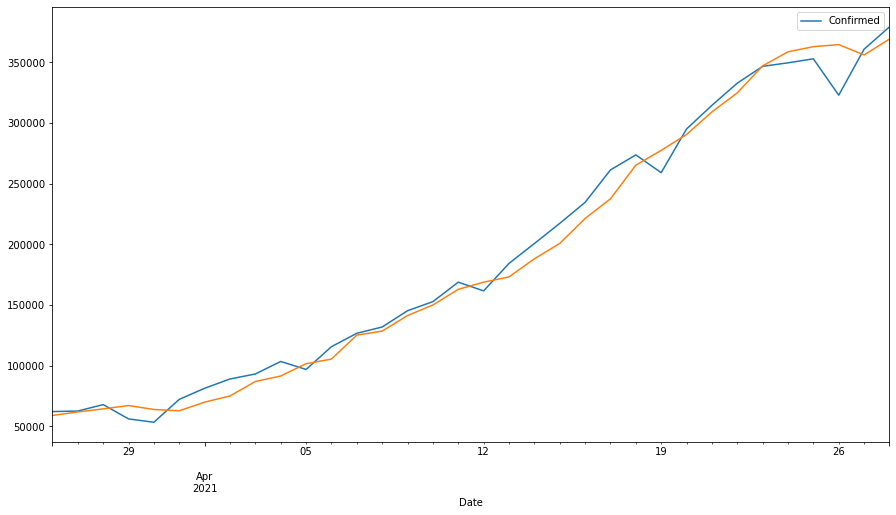

In [31]:
test_df['Confirmed'].plot(legend=True,figsize=(15,8))
prediction.plot()

## Forcasting

In [32]:
result_f = model.fit()

C:\Users\amalr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [33]:
fcast_cases = result_f.predict(len(ind),len(ind)+60,typ='levels').rename('SARIMA forecast')

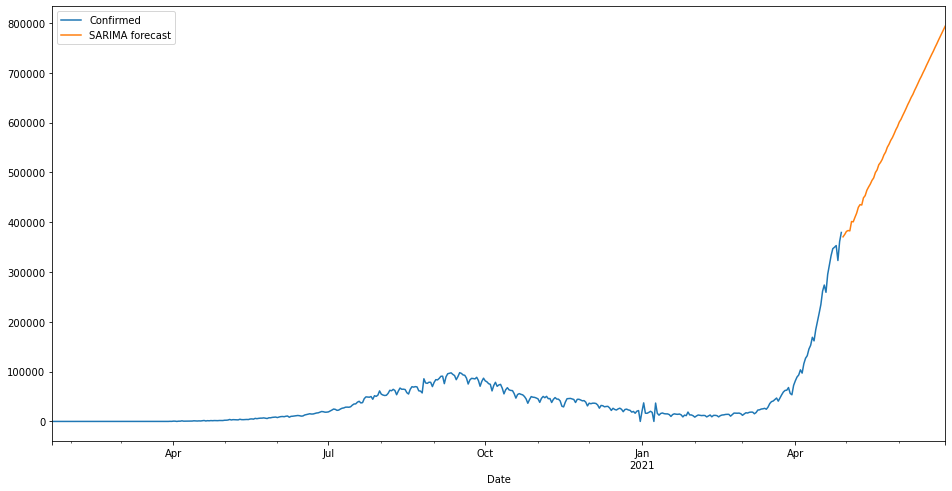

In [34]:
# prediction
ind["Confirmed"].plot(legend=True,figsize=(16,8))
fcast_cases.plot(legend=True)

# LSTM Based

### importing libraries

In [35]:

# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense



In [36]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [37]:
n_steps = 50
x,y = split_sequence(ind["Confirmed"],n_steps)

In [38]:
x

array([[     0,      0,      0, ...,      5,      4,     13],
       [     0,      0,      0, ...,      4,     13,      6],
       [     0,      0,      0, ...,     13,      6,     11],
       ...,
       [ 18599,  15388,  17921, ..., 346786, 349691, 352991],
       [ 15388,  17921,  22854, ..., 349691, 352991, 323023],
       [ 17921,  22854,  23285, ..., 352991, 323023, 360927]], dtype=int64)

In [136]:
y

array([     6,     11,      9,     20,     11,      6,     23,     14,
           38,     50,     86,     66,    103,     37,    121,     70,
          160,    100,     37,    227,    146,    601,    545,     24,
          515,    506,   1190,    533,    605,    809,    873,    848,
          759,   1248,   1034,    835,   1108,    922,   1370,   1893,
          924,   1541,   1290,   1707,   1453,   1753,   1607,   1561,
         1873,   1738,   1801,   2394,   2442,   2806,   3932,   2963,
         3587,   3364,   3344,   3113,   4353,   3607,   3524,   3763,
         3942,   3787,   4864,   5050,   4630,   6147,   5553,   6198,
         6568,   6629,   7113,   6414,   5843,   7293,   7300,   8105,
         8336,   8782,   7761,   8821,   9633,   9889,   9471,  10438,
        10864,   8442,  10218,  10459,  10930,  11458,  11929,  11502,
        10667,  10974,  12881,  13586,  14516,  15403,  14831,  14933,
        15968,  16922,  17296,  18552,  19906,  19459,  18522,  18641,
      

In [39]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

# Defining  Model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [105]:
# fit model
model.fit(x, y, epochs=200, verbose=0)

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


## Testing 

In [108]:
# testing data splitting
test = ind1[364:]
test

,Date,Confirmed
364,2021-01-19,13816
365,2021-01-20,15244
366,2021-01-21,14545
367,2021-01-22,14256
368,2021-01-23,14849
...,...,...
459,2021-04-24,349691
460,2021-04-25,352991
461,2021-04-26,323023
462,2021-04-27,360927


### Cleaning the test Data

In [109]:
# reserting the index to statrt from one
test.reset_index(inplace = True)
test

,index,Date,Confirmed
0,364,2021-01-19,13816
1,365,2021-01-20,15244
2,366,2021-01-21,14545
3,367,2021-01-22,14256
4,368,2021-01-23,14849
...,...,...,...
95,459,2021-04-24,349691
96,460,2021-04-25,352991
97,461,2021-04-26,323023
98,462,2021-04-27,360927


In [110]:
# removing the old index
test.drop("index",axis = 1,inplace = True)

test

C:\Users\amalr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed
0,2021-01-19,13816
1,2021-01-20,15244
2,2021-01-21,14545
3,2021-01-22,14256
4,2021-01-23,14849
...,...,...
95,2021-04-24,349691
96,2021-04-25,352991
97,2021-04-26,323023
98,2021-04-27,360927


## Perparing the data 

In [111]:
# shape of test
test.shape

(100, 2)

In [112]:
# Converting test to a list of sequnces form to input to model
n_steps = 50
x_test,y_test = split_sequence(test["Confirmed"],n_steps)
x_test

array([[ 13816,  15244,  14545, ...,  18599,  15388,  17921],
       [ 15244,  14545,  14256, ...,  15388,  17921,  22854],
       [ 14545,  14256,  14849, ...,  17921,  22854,  23285],
       ...,
       [ 18599,  15388,  17921, ..., 346786, 349691, 352991],
       [ 15388,  17921,  22854, ..., 349691, 352991, 323023],
       [ 17921,  22854,  23285, ..., 352991, 323023, 360927]], dtype=int64)

In [133]:
x_test.shape

(50, 50)

In [113]:
# testing data
x_test

array([[ 13816,  15244,  14545, ...,  18599,  15388,  17921],
       [ 15244,  14545,  14256, ...,  15388,  17921,  22854],
       [ 14545,  14256,  14849, ...,  17921,  22854,  23285],
       ...,
       [ 18599,  15388,  17921, ..., 346786, 349691, 352991],
       [ 15388,  17921,  22854, ..., 349691, 352991, 323023],
       [ 17921,  22854,  23285, ..., 352991, 323023, 360927]], dtype=int64)

In [114]:
#actual output of texting data
y_test

array([ 22854,  23285,  24882,  25320,  26291,  24492,  28903,  35871,
        39726,  40953,  43846,  46951,  40715,  47262,  53476,  59118,
        62258,  62714,  68020,  56211,  53480,  72330,  81466,  89129,
        93249, 103558,  96982, 115736, 126789, 131968, 145384, 152879,
       168912, 161736, 184372, 200739, 217353, 234692, 261394, 273802,
       259167, 295158, 314644, 332921, 346786, 349691, 352991, 323023,
       360927, 379308], dtype=int64)

### Testing the model with test data

In [117]:
# Initialising list to store the output 
y_pred = []

In [118]:
#testing
for i in range(len(x_test)):
    
    j= x_test[i].reshape((1, n_steps, n_features))
    yhat = model.predict(j, verbose=0)
    y_pred.append(yhat)
    

#### Output y_pred is now a list of arrays 

#### Converting it to a list of floats

In [119]:
y_pred = [float(i) for i in y_pred]
#y_pred

## Plotting the perdicted and actual sequence

In [120]:
# original sequence in df
dftest = ind1[364+50:]
dftest

,Date,Confirmed
414,2021-03-10,22854
415,2021-03-11,23285
416,2021-03-12,24882
417,2021-03-13,25320
418,2021-03-14,26291
419,2021-03-15,24492
420,2021-03-16,28903
421,2021-03-17,35871
422,2021-03-18,39726
423,2021-03-19,40953


#### Preparing the original sequence dataframe

In [121]:
# reseting the index
dftest.reset_index(inplace = True)
dftest

,index,Date,Confirmed
0,414,2021-03-10,22854
1,415,2021-03-11,23285
2,416,2021-03-12,24882
3,417,2021-03-13,25320
4,418,2021-03-14,26291
5,419,2021-03-15,24492
6,420,2021-03-16,28903
7,421,2021-03-17,35871
8,422,2021-03-18,39726
9,423,2021-03-19,40953


In [122]:
# Dropping the index
dftest.drop("index",axis =1,inplace = True)
dftest

C:\Users\amalr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed
0,2021-03-10,22854
1,2021-03-11,23285
2,2021-03-12,24882
3,2021-03-13,25320
4,2021-03-14,26291
5,2021-03-15,24492
6,2021-03-16,28903
7,2021-03-17,35871
8,2021-03-18,39726
9,2021-03-19,40953


In [123]:
# shape 
dftest.shape

(50, 2)

In [125]:
# Adding the original sequence to the dataframe
dftest["Confirmed"] = pd.Series(y_test)


<ipython-input-125-fd36c4961d76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest["Confirmed"] = pd.Series(y_test)


In [126]:
dftest

,Date,Confirmed
0,2021-03-10,22854
1,2021-03-11,23285
2,2021-03-12,24882
3,2021-03-13,25320
4,2021-03-14,26291
5,2021-03-15,24492
6,2021-03-16,28903
7,2021-03-17,35871
8,2021-03-18,39726
9,2021-03-19,40953


#### Preparing the predicted sequence dataframe

In [127]:
# fixing the index
dfpred = ind1[364+50:]
dfpred.reset_index(inplace = True)
dfpred.drop("index",axis =1,inplace = True)
dfpred

C:\Users\amalr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed
0,2021-03-10,22854
1,2021-03-11,23285
2,2021-03-12,24882
3,2021-03-13,25320
4,2021-03-14,26291
5,2021-03-15,24492
6,2021-03-16,28903
7,2021-03-17,35871
8,2021-03-18,39726
9,2021-03-19,40953


In [128]:
# Adding the predicted sequence to the dataframe
dfpred["Confirmed"] = pd.Series(y_pred)

<ipython-input-128-4b7135887256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpred["Confirmed"] = pd.Series(y_pred)


In [129]:
# predicted sequence dataframe
dfpred

,Date,Confirmed
0,2021-03-10,7822.944824
1,2021-03-11,13087.232422
2,2021-03-12,14121.614258
3,2021-03-13,10195.918945
4,2021-03-14,11720.149414
5,2021-03-15,9616.583984
6,2021-03-16,12200.421875
7,2021-03-17,13192.766602
8,2021-03-18,12096.916992
9,2021-03-19,24456.240234


### Setting the date of both dataframes as Index

###### To make the plotting easier

In [130]:
# changing the index as date
# for original test values
dftest["Date"] = pd.to_datetime(dftest["Date"],infer_datetime_format = True)
dftest = dftest.set_index('Date')
dftest

<ipython-input-130-33f4a56a668a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest["Date"] = pd.to_datetime(dftest["Date"],infer_datetime_format = True)


,Confirmed
Date,
2021-03-10,22854
2021-03-11,23285
2021-03-12,24882
2021-03-13,25320
2021-03-14,26291
2021-03-15,24492
2021-03-16,28903
2021-03-17,35871
2021-03-18,39726


In [131]:
# changing the index as date
# for predicted values
dfpred["Date"] = pd.to_datetime(dfpred["Date"],infer_datetime_format = True)
dfpred = dfpred.set_index('Date')
dfpred

<ipython-input-131-58026dbae1b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpred["Date"] = pd.to_datetime(dfpred["Date"],infer_datetime_format = True)


,Confirmed
Date,
2021-03-10,7822.944824
2021-03-11,13087.232422
2021-03-12,14121.614258
2021-03-13,10195.918945
2021-03-14,11720.149414
2021-03-15,9616.583984
2021-03-16,12200.421875
2021-03-17,13192.766602
2021-03-18,12096.916992


## Plotting the Predicted with the actual sequence

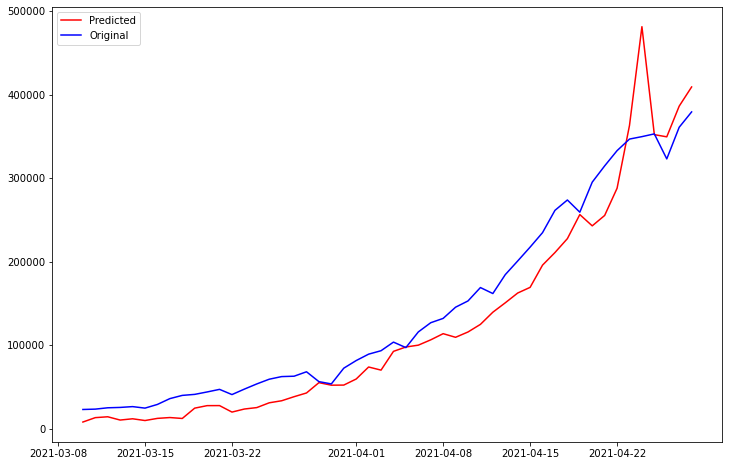

In [135]:
plt.plot(dfpred, color = "red", label = "Predicted")#Predicted
plt.plot(dftest, color = "blue", label = "Original")#actual
plt.legend(loc = "best")